<a href="https://colab.research.google.com/github/aghosh92/DCNN_MD/blob/main/Demo%20workflow/notebooks/STEM_image_DCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Notebook is prepared by Ayana Ghosh** 

Email: research.aghosh@gmail.com

### This notebook shows an example how to use the coordinates of atoms predicted by AtomAI, create a corresponding ASE object.

### The example follows a similar workflow (first stage to convert a STEM image to simulation object) as described in this paper, https://www.nature.com/articles/s41524-022-00733-7, provided DFT simulations were performed in this work for structure optimization followed by finite temperature AIMD simulations were performed on patches of the full system to generate results on energy landscape, dopant and graphene healing effects.

In [ ]:
#@title Install packages
!pip install atomai
!pip install ase

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 147 kB 34.8 MB/s 
     |████████████████████████████████| 193 kB 53.9 MB/s 
     |████████████████████████████████| 361 kB 72.2 MB/s 
     |████████████████████████████████| 865 kB 81.6 MB/s 
  Created wheel for mendeleev: filename=mendeleev-0.6.1-py2.py3-none-any.whl size=174981 sha256=499d48f448b14524500d2930210add5f7a3bb28b18a07c78ddc865d0fe6238cf
  Stored in directory: /root/.cache/pip/wheels/f4/4e/dd/06777c90710ce1766376ecc87979967fe69ff3affc29c0b530
Successfully built mendeleev
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.2 MB 33.6 MB/s 


Import essential libraries

In [ ]:
import atomai as aoi
import numpy as np
import matplotlib.pyplot as plt
import os, re
import sys
import pandas as pd
import glob
import cv2 as cv
import glob
import imageio
from typing import Dict, List, Union

import ase.io as io
from ase.io import read,write
from ase.io.vasp import read_vasp

import cv2 as cv
import glob
import imageio

Mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Example:

This block shows how to construct a supercell using coordinates directly from STEM images as predicted by a pre-trained Atom AI model.

Load data into the notebook:

In [ ]:
!gdown "https://drive.google.com/uc?id=1mpecY83LV0sqDbsCzvGgBw4XUhSkiTqZ"

Downloading...
From: https://drive.google.com/uc?id=1mpecY83LV0sqDbsCzvGgBw4XUhSkiTqZ
To: /content/Gdata_for_VAE0.npz
100% 968M/968M [00:19<00:00, 48.9MB/s]


In [ ]:
data = np.load("Gdata_for_VAE0.npz", allow_pickle=True)

#predict coordinates using a pre-trained Atom AI model

coordinates, dcnn_out, imgdata = data.values()
coordinates = coordinates[()]  # array to dict

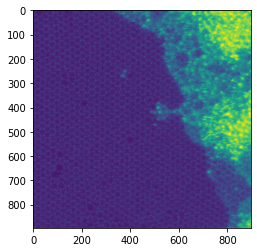

In [ ]:
plt.imshow(imgdata[0,:,:])

In [ ]:
coordinates_filtered = {}
for k, c in coordinates.items():
    coordinates_filtered[k] = c[c[:, -1] < 3]

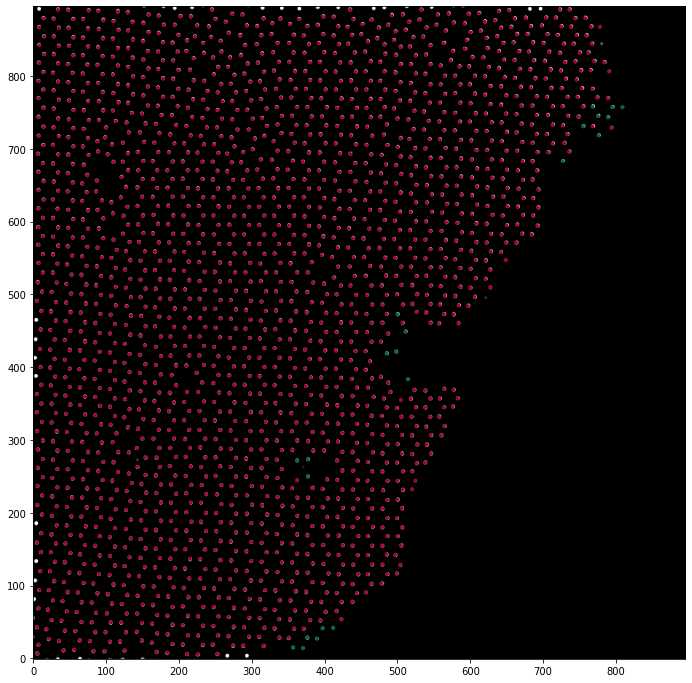

In [ ]:
aoi.utils.plot_coord(dcnn_out[0,:,:,0], coordinates_filtered[0], fsize=12)

Save coordinates for specific frame (0) as ASE object

In [ ]:
map_dict_graph = {0: "C", 1: "Si"}

In [ ]:
aoi.utils.ase_obj_basic(coordinates, 0, "Graphene", map_dict_graph, "/content/drive/MyDrive/POSCAR_basic", 0.104)

You have successfully created an ASE object. 

This is a cubic cell of Graphene. 

Now you can read it in using ase.io.vasp.read_vasp. 



In the next book, we shall use this object to perform an example simulation within LAMMPS-python environment.